In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [17]:
warnings.filterwarnings("ignore")
df=pd.read_csv("/content/sonar_dataset.csv")
df.sample(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
150,0.0231,0.0315,0.0170,0.0226,0.0410,0.0116,0.0223,0.0805,0.2365,0.2461,...,0.0125,0.0036,0.0123,0.0043,0.0114,0.0052,0.0091,0.0008,0.0092,M
26,0.0177,0.0300,0.0288,0.0394,0.0630,0.0526,0.0688,0.0633,0.0624,0.0613,...,0.0102,0.0122,0.0044,0.0075,0.0124,0.0099,0.0057,0.0032,0.0019,R
78,0.0108,0.0086,0.0058,0.0460,0.0752,0.0887,0.1015,0.0494,0.0472,0.0393,...,0.0029,0.0078,0.0114,0.0083,0.0058,0.0003,0.0023,0.0026,0.0027,R
112,0.0283,0.0599,0.0656,0.0229,0.0839,0.1673,0.1154,0.1098,0.1370,0.1767,...,0.0147,0.0170,0.0158,0.0046,0.0073,0.0054,0.0033,0.0045,0.0079,M
153,0.0117,0.0069,0.0279,0.0583,0.0915,0.1267,0.1577,0.1927,0.2361,0.2169,...,0.0053,0.0029,0.0020,0.0013,0.0029,0.0020,0.0062,0.0026,0.0052,M


In [18]:
df.shape

(207, 61)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [20]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [21]:
c=[i for i in range(1,62)]
df.columns=c

In [22]:
df.head(5)

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,61
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [28]:
df[61].value_counts()

,count
61,
M,111
R,96


In [38]:
x=df.drop(61,axis=1)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df[61])

In [39]:
from sklearn.model_selection import train_test_split as tts
x_tra,x_tes,y_tra,y_tes=tts(x,y,test_size=0.2,random_state=1)

In [48]:
model=keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,),activation="relu"),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_tra,y_tra,epochs=100,batch_size=8)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5668 - loss: 0.6904
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5343 - loss: 0.6719 
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6270 - loss: 0.6484 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6655 - loss: 0.6314 
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6283 - loss: 0.6107 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7636 - loss: 0.5468 
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7638 - loss: 0.4947  
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.4486 
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8624 - loss: 0.4283  
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7750 - loss: 0.4485 
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9021 - loss: 0.3744
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [75]:
model.evaluate(x_tes,y_tes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8051 - loss: 0.4960 


[0.5201435089111328, 0.7857142686843872]

In [64]:
y_pre=model.predict(x_tes).reshape(-1)
y_pred=np.round(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [65]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_tes,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.94      0.77      0.85        22

    accuracy                           0.86        42
   macro avg       0.87      0.86      0.86        42
weighted avg       0.87      0.86      0.86        42



In [80]:
modeld=keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,),activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation="sigmoid")
])

modeld.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

modeld.fit(x_tra,y_tra,epochs=100,batch_size=8)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5324 - loss: 0.7216
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4792 - loss: 0.7415
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5541 - loss: 0.6791
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5675 - loss: 0.6819
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4819 - loss: 0.7246
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4743 - loss: 0.7073
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5077 - loss: 0.7088
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5844 - loss: 0.6651
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5070 - loss: 0.6686
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5334 - loss: 0.6803
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4858 - loss: 0.6788
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

In [81]:
 modeld.predict(x_tes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[3.80010754e-02],
       [7.45024607e-02],
       [1.14595860e-01],
       [5.03065111e-03],
       [9.93661404e-01],
       [1.56393290e-01],
       [4.21344012e-01],
       [4.91235079e-03],
       [1.34172607e-02],
       [9.78487313e-01],
       [9.88439143e-01],
       [6.22850657e-01],
       [2.26663053e-02],
       [2.58368403e-02],
       [2.12793961e-01],
       [3.99506539e-01],
       [9.28065479e-01],
       [3.25586647e-02],
       [5.32405138e-01],
       [9.99377370e-01],
       [5.36960177e-03],
       [9.86825705e-01],
       [9.10547674e-01],
       [8.30392614e-02],
       [1.88647732e-01],
       [1.31905070e-02],
       [9.86052930e-01],
       [6.28410995e-01],
       [8.48064482e-01],
       [4.03124481e-01],
       [1.28787696e-01],
       [1.77004331e-04],
       [1.98390409e-01],
       [1.81780070e-01],
       [9.85749245e-01],
       [4.74238992e-01],
       [9.89811420e-01],
       [2.00749069e-01],
       [9.16188657e-01],
       [4.68223512e-01],


In [82]:
modeld.evaluate(x_tes,y_tes)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8576 - loss: 0.4771  


[0.4945739209651947, 0.8333333134651184]

<Axes: >

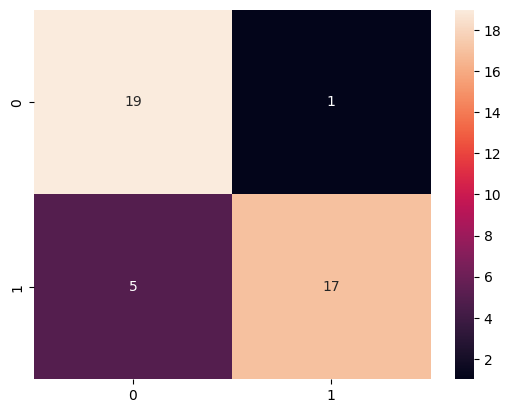

In [86]:
cm=tf.math.confusion_matrix(y_tes,y_pred)
sns.heatmap(cm,annot=True)# thia for the first overfitted model do as for second one